In [153]:
import pandas as pd
import numpy as np
import matplotlib as plt
plt.rcParams['font.size'] = 6.5

In [ ]:
#The data was crawled from 100 pages of Ipaidbribe.com.
#The posts were made from 31st October to 26th November 2019.
#some findings are as follows :
#As per the analysis, the maximum bribe was paid in Hospitals and Medical Care and Health Services, followed by commercial 
#and Industries department.
#Bangalore is the city where maximum bribe amount was paid.
#This can be because maximum reportings were done in Bangalore and Ipaidbribe.com is based out of bangalore.
#total amount paid as bribe from 31st october to november 26 was 55,806,569,752 (55.8 Billions)
#Maximum reportings were done for Hospitals and Medical Care, followed by Certificates 
#The highest amount was paid on 23rd November.
#Bangalore has the highest no. of reportings. 
#This can be owed to strong presence of Ipaidbribe.com in Bangalore and awareness about it.
#Bangalore has the highest number of views, followed by Chennai. 
#This can be attributed to awarenss about the site in Southern part of India.
#Maximum views were received on November 3rd, followed by November 18 and November 23rd. 
#It seems like people usually browse articles on weekends
#Maximum views were received for articles relating to Hospitals and medical care division. 
#This can be attributed to the highest number of postings in this department.

In [3]:
df = pd.read_csv(r"C:\Users\acer\Desktop\paidbribe.csv")

In [4]:
df.head()

,title,amount,department,transDetail,views,city,date
0,They asking me bribe for community certificate,Paid INR 100\r\n,Certificates,217387,\r\n,"Thiruvarur\r\n , Tamil Nadu","November 26, 2019"
1,Birhalganj police asking for bribe,"Paid INR 10,000\r\n",FIR and Complaints,217386,Visitors,"Gorakhpur\r\n , Uttar Pra...","November 26, 2019"
2,Paid bribe for bike towed from parking place,"Paid INR 1,000\r\n","Traffic Fines, Penalties, Rules",217299,59 views,"Bangalore\r\n , Karnataka","November 24, 2019"
3,Over speeding,Paid INR 350\r\n,"Traffic Fines, Penalties, Rules",217297,58 views,"Bangalore\r\n , Karnataka","November 24, 2019"
4,Corruption,"Paid INR 8,000\r\n",Land Registration,217296,165 views,"Yellandu\r\n , Telangana","November 23, 2019"


In [5]:
df['transDetail'].is_unique

False

In [6]:
df.loc[1]

title                         Birhalganj police asking for bribe
amount               Paid INR 10,000\r\n                        
department                                    FIR and Complaints
transDetail                                               217386
views           Visitors                                        
city           Gorakhpur\r\n                      , Uttar Pra...
date                                           November 26, 2019
Name: 1, dtype: object

In [7]:
df.views.str.extract('(\d+)')

,0
0,NaN
1,NaN
2,59
3,58
4,165
5,146
6,162
7,148
8,148
9,141


In [10]:
extr = df['views'].str.extract('(\d+)', expand=False)
extr.head()

0    NaN
1    NaN
2     59
3     58
4    165
Name: views, dtype: object

In [11]:
df['views'] = pd.to_numeric(extr)
df['views'].dtype

dtype('float64')

In [12]:
df.head()

,title,amount,department,transDetail,views,city,date
0,They asking me bribe for community certificate,Paid INR 100\r\n,Certificates,217387,NaN,"Thiruvarur\r\n , Tamil Nadu","November 26, 2019"
1,Birhalganj police asking for bribe,"Paid INR 10,000\r\n",FIR and Complaints,217386,NaN,"Gorakhpur\r\n , Uttar Pra...","November 26, 2019"
2,Paid bribe for bike towed from parking place,"Paid INR 1,000\r\n","Traffic Fines, Penalties, Rules",217299,59.0,"Bangalore\r\n , Karnataka","November 24, 2019"
3,Over speeding,Paid INR 350\r\n,"Traffic Fines, Penalties, Rules",217297,58.0,"Bangalore\r\n , Karnataka","November 24, 2019"
4,Corruption,"Paid INR 8,000\r\n",Land Registration,217296,165.0,"Yellandu\r\n , Telangana","November 23, 2019"


In [69]:
amtextr = df['amount'].str.extract('([,\d]+.?\d+)', expand =False)
amtextr.head()

0       100
1    10,000
2     1,000
3       350
4     8,000
Name: amount, dtype: object

In [71]:
amtextr = amtextr.str.replace(',', '').astype(float)

In [72]:
amtextr.head()

0      100.0
1    10000.0
2     1000.0
3      350.0
4     8000.0
Name: amount, dtype: float64

In [73]:
df['amount'] = pd.to_numeric(amtextr)
df['amount'].dtype
df.head()

,title,amount,department,transDetail,views,city,date
0,They asking me bribe for community certificate,100.0,Certificates,217387,NaN,"Thiruvarur\r\n , Tamil Nadu","November 26, 2019"
1,Birhalganj police asking for bribe,10000.0,FIR and Complaints,217386,NaN,"Gorakhpur\r\n , Uttar Pra...","November 26, 2019"
2,Paid bribe for bike towed from parking place,1000.0,"Traffic Fines, Penalties, Rules",217299,59.0,"Bangalore\r\n , Karnataka","November 24, 2019"
3,Over speeding,350.0,"Traffic Fines, Penalties, Rules",217297,58.0,"Bangalore\r\n , Karnataka","November 24, 2019"
4,Corruption,8000.0,Land Registration,217296,165.0,"Yellandu\r\n , Telangana","November 23, 2019"


In [74]:
df['department'].unique()

array(['Certificates', 'FIR and Complaints',
       'Traffic Fines, Penalties, Rules', 'Land Registration',
       'Verification and Certificates', 'Others', 'Post and Parcel',
       'Excess Baggage', 'Caste Certificate', 'Property Registration',
       'Policies and Procedures', 'Commercial and Industrial',
       'Food License', 'Autorickshaws', 'Loans', 'Services',
       'License for Sale of Drugs', 'Water Connection', nan,
       'Change of Tariff in Domestic to Commercial',
       'Ticket and Seat Related', 'College Leaving Certificate',
       'Vehicle Fitness', 'Customs Check and Clearance',
       'Payment and Arrears', 'Building Construction Approval',
       'Telephone and Internet Connection', 'Births, Family and Care',
       'Health Services', 'Hospitals and Medical Care', 'Sales Tax'],
      dtype=object)

In [155]:
#As per the analysis, the maximum bribe was paid in Hospitals and Medical Care and Health Services, followed by commercial 
#and Industries department.
total_amount_departmentwise =  df.groupby('department')['amount'].sum()
total_amount_departmentwise.nlargest(10)

department
Others                               5.563195e+10
Hospitals and Medical Care           1.320000e+08
Health Services                      3.960000e+07
Commercial and Industrial            6.800000e+05
Services                             4.580000e+05
Land Registration                    3.640000e+05
Building Construction Approval       3.000000e+05
Customs Check and Clearance          2.000000e+05
License for Sale of Drugs            2.000000e+05
Telephone and Internet Connection    2.000000e+05
Name: amount, dtype: float64

In [136]:
total_amount_citywise = df.groupby('city')['amount'].sum()
total_amount_citywise.nlargest(5)
#Based on the data, Bangalore is the city where maximum bribe amount was paid.
#This can be because maximum reportings were done in Bangalore and Ipaidbribe.com is based out of bangalore.

city
Bangalore\r\n                      , Karnataka    2.040236e+10
Chennai\r\n                      , Tamil Nadu     2.020038e+10
Belgaum\r\n                      , Karnataka      2.610000e+09
Mangalore\r\n                      , Karnataka    2.404000e+09
Hubli\r\n                      , Karnataka        2.226000e+09
Name: amount, dtype: float64

In [102]:
total_paid_bribe = df['amount'].sum()
total_paid_bribe
#total amount paid as bribe from 31st october to november 26 was 55,806,569,752 (55.8 Billions)

55806569752.0

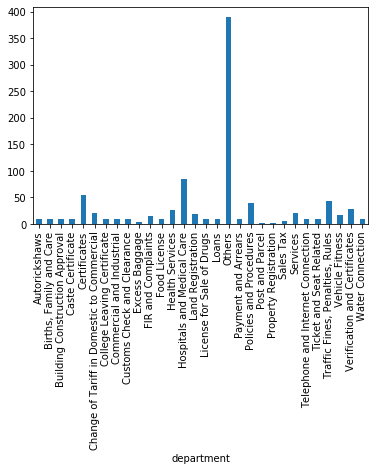

In [133]:
total_reports_departmentwise = df.groupby('department')['transDetail'].count()
total_reports_departmentwise.plot(kind = 'bar')
#Maximum reportings were done for Hospitals and Medical Care, followed by Certificates 

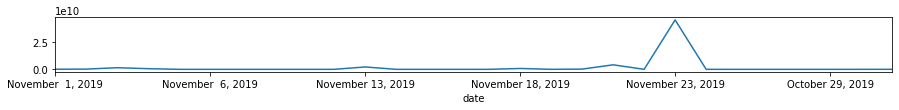

In [139]:
total_amount_datewise = df.groupby('date')['amount'].sum()
ax = total_amount_datewise.plot(kind = 'line', figsize=(15, 1))
#The highest amount was paid on 23rd November.

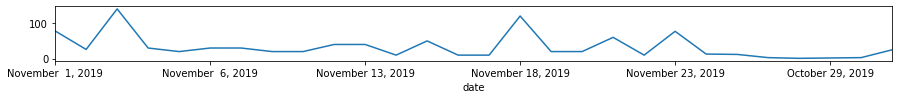

In [140]:
total_reports_datewise = df.groupby('date')['transDetail'].count()
total_reports_datewise.plot(kind = 'line', figsize =(15,1))
#Maximum reportings were done on November 3rd, followed by November 18 and November 23rd. 
#It seems like people usually post on weekends 

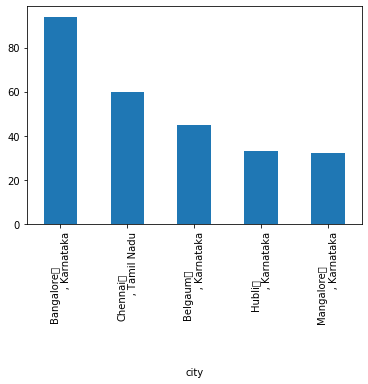

In [125]:
total_reports_citywise = df.groupby('city')['transDetail'].count()
total_reports_citywise.nlargest(5).plot(kind = 'bar')
#Bangalore has the highest no. of reportings. 
#This can be owed to strong presence of Ipaidbribe.com in Bangalore and awareness about it.

In [113]:
total_views = df['views'].count()
total_views
#The total number of views received during the analysis duration were 736.

736

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


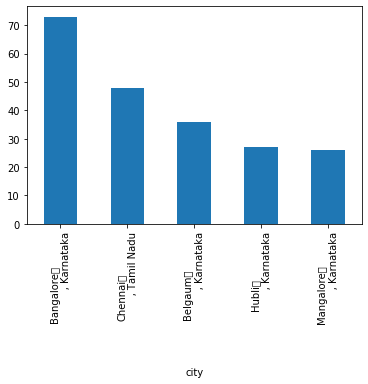

In [124]:
total_views_citywise = df.groupby('city')['views'].count()
total_views_citywise.nlargest(5).plot(kind = 'bar')
#Bangalore has the highest number of views, followed by Chennai. 
#This can be attributed to awarenss about the site in Southern part of India.

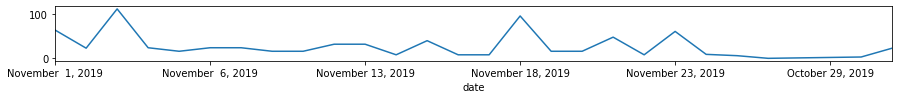

In [142]:
total_views_datewise = df.groupby('date')['views'].count()
total_views_datewise
total_views_datewise.plot(kind = 'line', figsize =(15,1))
#Maximum views were received on November 3rd, followed by November 18 and November 23rd. 
#It seems like people usually browse articles on weekends

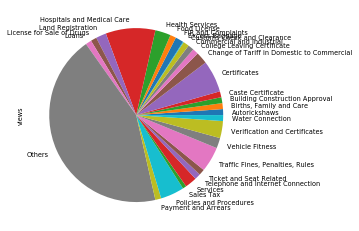

In [154]:
total_views_departmentwise = df.groupby('department')['views'].count()
total_views_departmentwise
total_views_departmentwise.plot(kind = 'pie')
#Maximum views were received for articles relating to Hospitals and medical care division. 
#This can be attributed to the highest number of postings in this department.